# Unit 5 - Financial Planning

In [1]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [2]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [3]:
# Set current amount of crypto assets
my_btc = 1.2
my_eth = 5.3

In [4]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [5]:
# Fetch current BTC price
btc_response = requests.get(btc_url).json()
btc_price = btc_response["data"]["1"]["quotes"]["CAD"]["price"]
my_btc_value = btc_price * my_btc

# Fetch current ETH price
eth_response = requests.get(eth_url).json()
eth_price = eth_response["data"]["1027"]["quotes"]["CAD"]["price"]
my_eth_value = eth_price * my_eth

# Compute current value of my crpto
my_btc_value = btc_price * my_btc
my_eth_value = eth_price * my_eth

# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $56671.93
The current value of your 5.3 ETH is $16536.31


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [6]:
# Set current amount of shares
my_agg = 200
my_spy = 50

In [7]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca API object
api = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version = "v2"
)

In [8]:
# Format current date as ISO format
today = pd.Timestamp("2021-01-19", tz="America/New_York").isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG
# (use a limit=1000 parameter to call the most recent 1000 days of data)
df_ticker = api.get_barset(
    tickers,
    timeframe,
    start=today,
    limit=1000
).df

# Preview DataFrame
df_ticker.head()

AGG                                        SPY  \
                             open      high     low   close   volume    open   
time                                                                           
2021-01-19 00:00:00-05:00  117.27  117.4200  117.22  117.41  5057257  378.34   
2021-01-20 00:00:00-05:00  117.35  117.4300  117.31  117.40  3877734  381.11   
2021-01-21 00:00:00-05:00  117.22  117.2985  117.14  117.26  5801029  384.49   
2021-01-22 00:00:00-05:00  117.29  117.3200  117.19  117.26  3469745  382.25   
2021-01-25 00:00:00-05:00  117.39  117.5600  117.36  117.54  3977366  383.67   

                                                                
                               high      low   close    volume  
time                                                            
2021-01-19 00:00:00-05:00  379.2300  376.750  378.63  42257108  
2021-01-20 00:00:00-05:00  384.7900  380.690  383.86  53064901  
2021-01-21 00:00:00-05:00  384.9500  383.250  384.20  41800991  
2021-01-22 00:00:00-05:00  384.1256  381.835  382.86  39108239  
2021-01-25 00:00:00-05:00  384.7700  378.460  384.40  61090775

In [9]:
# Pick AGG and SPY close prices
agg_close_price = float(df_ticker["AGG"]["close"][0])
spy_close_price = float(df_ticker["SPY"]["close"][0])

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $117.41
Current SPY closing price: $378.63


In [10]:
# Compute the current value of shares
agg_value = agg_close_price * my_agg
spy_value = spy_close_price * my_spy

# Print current value of shares
print(f"The current value of your {my_spy} SPY shares is ${spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${agg_value:0.2f}")

The current value of your 50 SPY shares is $18931.50
The current value of your 200 AGG shares is $23482.00


### Savings Health Analysis

In [11]:
# Set monthly household income
monthly_income = 12000

# Consolidate financial assets data
savings_data = [my_btc_value + my_eth_value, agg_value + spy_value]

# Create savings DataFrame
df_savings = pd.DataFrame(savings_data, columns=["amount"], index=["crypto", "shares"])

# Display savings DataFrame
display(df_savings)

,amount
crypto,73208.236538
shares,42413.500000


<AxesSubplot:title={'center':'Composition of Personal Savings'}, ylabel='amount'>

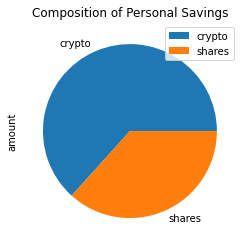

In [12]:
# Plot savings pie chart
df_savings.plot.pie(title="Composition of Personal Savings", y="amount")

In [13]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
total_savings = float(df_savings.sum())

# Validate saving health
if total_savings > emergency_fund:
    print(f"Congratulations! You have enough money in your emergency fund.")
elif total_savings == emergency_fund:
    print(f"ldjglajdsg")
else:
    print(f"djffklsdjg")
    

Congratulations! You have enough money in your emergency fund.


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [14]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2016-05-01', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2021-05-01', tz='America/New_York').isoformat()

In [15]:
# Get 5 years' worth of historical data for SPY and AGG
# (use a limit=1000 parameter to call the most recent 1000 days of data)
df_stock_data = api.get_barset(
    tickers,
    timeframe,
    start=start_date,
    end=end_date,
    limit=1000,
).df

# Display sample data
df_stock_data.head()

AGG                                         \
                             open     high       low    close     volume   
time                                                                       
2017-05-10 00:00:00-04:00  108.60  108.660  108.4400  108.520  1427511.0   
2017-05-11 00:00:00-04:00  108.35  108.540  108.3435  108.515  1773499.0   
2017-05-12 00:00:00-04:00  108.81  108.940  108.7800  108.920  1136553.0   
2017-05-15 00:00:00-04:00  108.85  108.940  108.8200  108.890  1620264.0   
2017-05-16 00:00:00-04:00  108.88  109.101  108.8800  109.000  1394153.0   

                              SPY                                       
                             open    high     low    close      volume  
time                                                                    
2017-05-10 00:00:00-04:00     NaN     NaN     NaN      NaN         NaN  
2017-05-11 00:00:00-04:00  239.35  239.57  238.13  239.410  45435690.0  
2017-05-12 00:00:00-04:00  239.09  239.21  238.67  239.030  35283567.0  
2017-05-15 00:00:00-04:00  239.47  240.44  239.45  240.245  42230620.0  
2017-05-16 00:00:00-04:00  240.62  240.67  239.63  240.100  37206183.0

In [16]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
MC_AGG_SPY = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.4, .6],
    num_simulation = 500,
    num_trading_days = 252*30
)

In [17]:
# Printing the simulation input data
MC_AGG_SPY.portfolio_data.head()

AGG                                         \
                             open     high       low    close     volume   
time                                                                       
2017-05-10 00:00:00-04:00  108.60  108.660  108.4400  108.520  1427511.0   
2017-05-11 00:00:00-04:00  108.35  108.540  108.3435  108.515  1773499.0   
2017-05-12 00:00:00-04:00  108.81  108.940  108.7800  108.920  1136553.0   
2017-05-15 00:00:00-04:00  108.85  108.940  108.8200  108.890  1620264.0   
2017-05-16 00:00:00-04:00  108.88  109.101  108.8800  109.000  1394153.0   

                                           SPY                           \
                          daily_return    open    high     low    close   
time                                                                      
2017-05-10 00:00:00-04:00          NaN     NaN     NaN     NaN      NaN   
2017-05-11 00:00:00-04:00    -0.000046  239.35  239.57  238.13  239.410   
2017-05-12 00:00:00-04:00     0.003732  239.09  239.21  238.67  239.030   
2017-05-15 00:00:00-04:00    -0.000275  239.47  240.44  239.45  240.245   
2017-05-16 00:00:00-04:00     0.001010  240.62  240.67  239.63  240.100   

                                                    
                               volume daily_return  
time                                                
2017-05-10 00:00:00-04:00         NaN          NaN  
2017-05-11 00:00:00-04:00  45435690.0          NaN  
2017-05-12 00:00:00-04:00  35283567.0    -0.001587  
2017-05-15 00:00:00-04:00  42230620.0     0.005083  
2017-05-16 00:00:00-04:00  37206183.0    -0.000604

In [18]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_AGG_SPY.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Users\jerem\Desktop\FinTech\API-Financial-Planning\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.004547,1.013184,0.986931,1.006018,0.997937,0.996766,0.997427,1.003232,0.999961,1.003121,...,1.005325,1.002614,1.002797,0.999679,0.997181,1.002026,1.000536,1.020360,1.000012,0.985360
2,1.004854,1.019667,0.975154,1.003441,0.997042,0.989288,0.993506,1.011753,0.992151,1.020290,...,1.013300,0.999560,0.997196,0.998208,0.989656,0.995396,0.981992,1.011168,0.999335,0.977163
3,0.998947,1.013171,0.977352,0.996938,1.001715,0.991481,1.000470,1.011475,0.990798,1.007860,...,1.020684,0.998081,1.015539,0.996178,0.987239,1.007769,0.978698,0.999658,1.000630,0.972651
4,1.003229,1.019990,0.976021,1.010044,1.004055,1.013987,1.001065,0.993353,1.001896,1.010136,...,1.019531,1.012559,1.021045,0.997947,0.985876,1.002109,0.966793,1.005907,1.004344,0.962595
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,25.086082,24.494204,13.304092,21.014242,19.916218,9.150417,14.574398,31.282872,16.390326,17.596067,...,10.044161,8.880384,7.277397,12.397570,8.668695,12.433031,27.770144,36.774346,7.837321,21.375381
7557,25.267275,24.516596,13.249640,20.719282,19.740841,9.117611,14.694213,31.195798,16.229895,17.625439,...,9.924254,8.965119,7.272434,12.395052,8.632145,12.344182,27.147801,36.479231,7.787700,21.183126
7558,25.354196,24.601260,13.462665,20.930369,19.575130,9.215440,14.756258,31.406723,15.960563,17.450819,...,9.789125,8.876539,7.213806,12.330614,8.701461,12.463845,27.512453,36.159391,7.796891,21.317984
7559,25.681496,24.613288,13.431387,20.772099,19.908653,9.270339,14.878200,31.448180,15.919053,17.696497,...,9.654709,8.859236,7.256456,12.247469,8.745986,12.425658,27.314335,35.919769,7.804787,21.385488


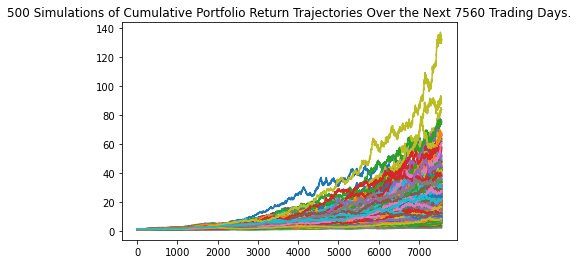

In [19]:
# Plot simulation outcomes
line_plot = MC_AGG_SPY.plot_simulation()

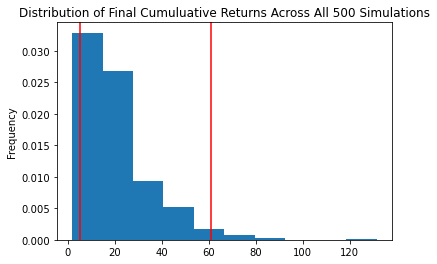

In [20]:
# Plot probability distribution and confidence intervals
dist_plot = MC_AGG_SPY.plot_distribution()

### Retirement Analysis

In [21]:
# Fetch summary statistics from the Monte Carlo simulation results
stats = MC_AGG_SPY.summarize_cumulative_return()

# Print summary statistics
print(stats)

count           500.000000
mean             20.946734
std              14.777832
min               1.919572
25%              10.569807
50%              16.990673
75%              25.935354
max             131.420277
95% CI Lower      5.270584
95% CI Upper     60.799102
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [22]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(stats[8]*initial_investment,2)
ci_upper = round(stats[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $105411.67 and $1215982.05


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [23]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower = round(stats[8]*initial_investment,2)
ci_upper = round(stats[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $158117.51 and $1823973.07


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [24]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
MC2_AGG_SPY = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.4, .6],
    num_simulation = 500,
    num_trading_days = 252*5
)

In [25]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
MC2_AGG_SPY.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Users\jerem\Desktop\FinTech\API-Financial-Planning\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.999824,1.010739,0.988401,1.020679,0.995627,0.993054,1.001360,1.001594,0.995385,0.996870,...,0.982554,0.996924,0.987651,0.999261,1.001902,1.002393,0.994772,0.997875,0.999594,1.006539
2,1.009752,1.014348,0.973279,1.025187,0.996765,0.987412,0.998369,1.000023,0.987368,1.009455,...,0.989343,0.994331,1.001123,0.996372,0.999347,1.004511,0.979577,1.002195,0.996406,0.996113
3,1.007867,1.005462,0.969745,1.018111,1.001191,0.977372,0.999976,1.004216,0.988556,1.020657,...,0.988855,0.991013,0.982136,0.997689,0.997940,1.016938,0.976080,0.999996,0.995354,0.992355
4,0.995913,1.004349,0.958278,1.010772,1.013959,0.979191,0.993582,1.004467,0.980894,1.017526,...,0.990758,0.981495,0.967343,0.985416,1.000213,1.028196,0.977837,0.993439,1.019837,0.990292
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,1.782039,1.666169,1.625211,1.183875,1.870324,1.021141,0.731091,2.012677,2.116735,1.082624,...,1.334174,1.249114,2.868588,1.569642,1.885678,1.459805,1.183809,1.460520,0.998492,1.405227
1257,1.803385,1.664389,1.614578,1.179847,1.875892,1.029985,0.737894,2.008228,2.146301,1.099923,...,1.324547,1.259552,2.857364,1.572836,1.915807,1.458866,1.185801,1.471223,1.005285,1.404410
1258,1.823838,1.670820,1.604533,1.176257,1.903103,1.032710,0.740602,2.011644,2.160069,1.100524,...,1.323349,1.253502,2.873579,1.582164,1.923024,1.455334,1.201214,1.467776,1.003782,1.392820
1259,1.853401,1.668499,1.581795,1.165650,1.888088,1.024368,0.741531,2.004649,2.169052,1.106739,...,1.326680,1.275989,2.847988,1.603370,1.933410,1.454413,1.218521,1.473976,1.002950,1.407200


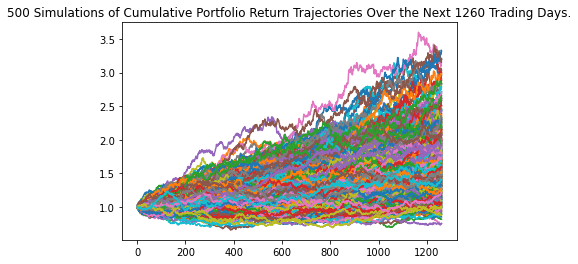

In [26]:
# Plot simulation outcomes
line_plot = MC2_AGG_SPY.plot_simulation()

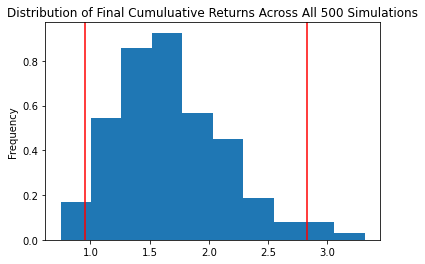

In [27]:
# Plot probability distribution and confidence intervals
dist_plot = MC2_AGG_SPY.plot_distribution()

In [28]:
# Fetch summary statistics from the Monte Carlo simulation results
stats2 = MC2_AGG_SPY.summarize_cumulative_return()

# Print summary statistics
print(stats2)

count           500.000000
mean              1.675185
std               0.463457
min               0.747159
25%               1.341630
50%               1.612866
75%               1.954137
max               3.319108
95% CI Lower      0.955645
95% CI Upper      2.826034
Name: 1260, dtype: float64


In [31]:
# Set initial investment
initial_investment = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_five = round(stats2[8]*initial_investment,2)
ci_upper_five = round(stats2[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 5 years will end within in the range of $57338.73 and $169562.06


### Ten Years Retirement Option

In [32]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
MC3_AGG_SPY = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.4, .6],
    num_simulation = 500,
    num_trading_days = 252*10
)

In [33]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
MC3_AGG_SPY.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Users\jerem\Desktop\FinTech\API-Financial-Planning\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.003432,1.000329,1.000642,1.002871,0.987874,0.987329,1.006225,1.002171,0.991697,0.997393,...,1.000930,1.004385,1.005255,1.002750,0.993304,1.012025,1.007546,1.015952,1.014353,0.992529
2,1.021200,0.990314,0.997452,1.002196,0.996246,0.994679,1.000460,1.002257,0.988513,0.992292,...,0.986971,0.995678,1.014250,1.004871,0.989028,1.014938,1.006175,1.024786,1.012464,0.996634
3,1.030265,0.990390,0.989403,0.983439,1.000493,0.998742,1.009506,1.009422,0.986757,0.982673,...,0.991883,0.999154,1.012207,1.001475,0.990288,1.017611,1.011500,1.020943,1.009989,0.999590
4,1.021905,0.981076,0.992613,0.974865,1.000996,0.992707,1.000391,1.002538,1.003175,0.980455,...,0.998001,0.994097,1.014033,0.996187,0.997599,1.008682,1.012401,1.019665,1.016335,1.006706
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,8.394202,3.525666,3.450995,5.093876,2.329071,7.331605,3.174358,1.917766,5.343711,1.420652,...,2.485584,4.094026,3.424925,1.742670,1.155690,3.512768,1.908925,1.004034,2.584821,2.473289
2517,8.269439,3.564754,3.511726,5.067286,2.315565,7.319246,3.130438,1.927002,5.311741,1.426795,...,2.504098,4.134435,3.377083,1.752585,1.164960,3.500052,1.907041,1.014814,2.591044,2.468204
2518,8.209686,3.536886,3.519930,5.111416,2.312472,7.413796,3.141571,1.950617,5.309115,1.419300,...,2.510130,4.119033,3.364766,1.767105,1.178348,3.487411,1.929959,1.001496,2.604697,2.442495
2519,8.198907,3.615539,3.510146,5.046519,2.342638,7.411342,3.151756,1.940182,5.336137,1.434748,...,2.515992,4.162599,3.361428,1.766822,1.177478,3.499136,1.930331,1.001348,2.590466,2.472781


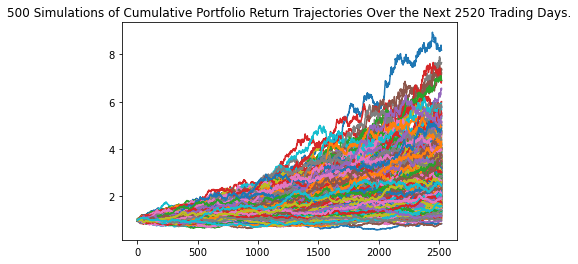

In [34]:
# Plot simulation outcomes
line_plot = MC3_AGG_SPY.plot_simulation()

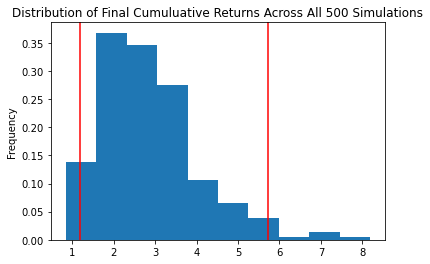

In [35]:
# Plot probability distribution and confidence intervals
dist_plot = MC3_AGG_SPY.plot_distribution()

In [36]:
# Fetch summary statistics from the Monte Carlo simulation results
stats3 = MC3_AGG_SPY.summarize_cumulative_return()

# Print summary statistics
print(stats3)

count           500.000000
mean              2.853798
std               1.193016
min               0.846923
25%               2.010436
50%               2.638799
75%               3.467747
max               8.186444
95% CI Lower      1.178646
95% CI Upper      5.711433
Name: 2520, dtype: float64


In [37]:
# Set initial investment
initial_investment = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_ten = round(stats3[8]*initial_investment,2)
ci_upper_ten = round(stats3[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 10 years will end within in the range of $70718.75 and $342686.01
